In [1]:
import pandas as pd

df = pd.read_csv("sample/Online_Courses.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'Title', 'URL', 'Short Intro', 'Category', 'Sub-Category',
       'Course Type', 'Language', 'Subtitle Languages', 'Skills',
       'Instructors', 'Rating', 'Number of viewers', 'Duration', 'Site',
       'Program Type', 'Courses', 'Level', 'Number of Reviews',
       'Unique Projects', 'Prequisites', 'What you learn', 'Related Programs',
       'Monthly access', '6-Month access', '4-Month access', '3-Month access',
       '5-Month access', '2-Month access', 'School', 'Topics related to CRM',
       'ExpertTracks', 'FAQs', 'Course Title', 'Course URL',
       'Course Short Intro', 'Weekly study', 'Premium course',
       'What's include', 'Rank', 'Created by', 'Program', 'Number of ratings',
       'Price', 'COURSE CATEGORIES'],
      dtype='object')

   Unnamed: 0                                              Title  \
0           0                    Machine Learning Specialization   
1           1        Introduction to Data Science Specialization   
2           2  Data Science Fundamentals with Python and SQL ...   
3           3       Key Technologies for Business Specialization   
4           4                       Deep Learning Specialization   

                                                 URL  \
0  https://www.coursera.org/specializations/machi...   
1  https://www.coursera.org/specializations/intro...   
2  https://www.coursera.org/specializations/data-...   
3  https://www.coursera.org/specializations/key-t...   
4  https://www.coursera.org/specializations/deep-...   

                                         Short Intro      Category  \
0  #BreakIntoAI with Machine Learning Specializat...  Data Science   
1  Launch your career in data science. Gain found...  Data Science   
2  Build the Foundation for your Data Scienc

/var/folders/br/1kjy1zln6p30nydtdf_n8kjc0000gp/T/ipykernel_37095/3936196965.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


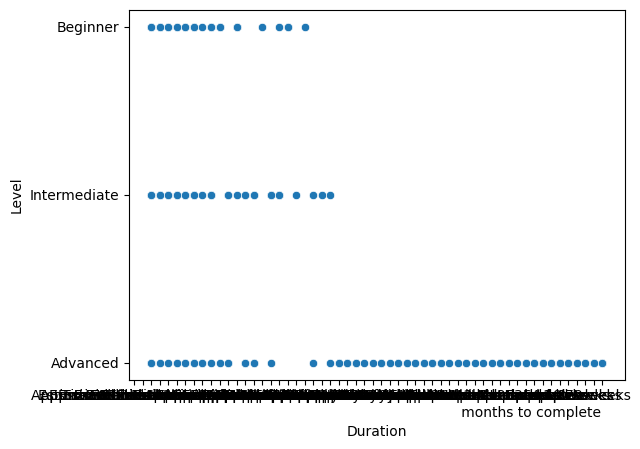

Level
Advanced        5118
Intermediate     112
Beginner          43
Name: count, dtype: int64
                                                                Level Mapping  \
                                                                         mean   
Category                 Instructors                                            
Arts and Humanities      A/Professor Iain Hay                             NaN   
                         Alex Roediger                                    NaN   
                         Amanda Monaco                                    NaN   
                         Amity Gaige                                      NaN   
                         Amy Bloom                                        NaN   
...                                                                       ...   
Social Sciences          Shyam Balganesh                                  NaN   
                         Tamy Chapman ,Helen Nam ,Brad Gilpin ,           NaN   
Tecnologia da 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.head())
print(df.info())
print(df.describe())

df.fillna(method="ffill", inplace=True)

instructor_counts = df["Instructors"].value_counts()
print(instructor_counts)

sns.scatterplot(x=df["Duration"], y=df["Level"])
plt.show()

instructor_counts = df["Level"].value_counts()
print(instructor_counts)

levels = {"Advanced": 3, "Intermediate": 2, "Beginner": 1}

df["Level Mapping"] = df["Level"].map(levels)
grouped = df.groupby(["Category", "Instructors"]).agg({"Level Mapping": ["mean", "count"]})
print(grouped)

In [87]:
filtered_data = df[df["Category"].isin(["Data Science", "Business", "Information Technology",
       "Computer Science",  "Personal Development"])]
filtered_data = filtered_data[filtered_data["Skills"].notna()]
filtered_data = filtered_data[filtered_data["Course Type"].isin(["Course"])]

In [88]:
# Coalescing duplicate columns (combining non-null values)
filtered_data["Title"] = filtered_data["Title"].combine_first(filtered_data["Course Title"])
filtered_data["URL"] = filtered_data["URL"].combine_first(filtered_data["Course URL"])
filtered_data["Short Intro"] = filtered_data["Short Intro"].combine_first(filtered_data["Course Short Intro"])
filtered_data["Category"] = filtered_data["Category"].combine_first(filtered_data["COURSE CATEGORIES"])
filtered_data["Skills"] = filtered_data["Skills"].combine_first(filtered_data["What's include"])
filtered_data["Rating"] = filtered_data["Rating"].str.replace("stars", "").astype(float)
filtered_data["Number of viewers"] = filtered_data["Number of viewers"].str.strip().str.replace(",", "").astype(float)
# Now you can drop the unnecessary duplicate columns if needed
filtered_data = filtered_data.drop(["Course Title", "Course URL", "Course Short Intro", "COURSE CATEGORIES", "What's include"], axis=1)


In [89]:
selected_columns = ["Title", "URL", "Short Intro", "Course Type", "Language", "Subtitle Languages", "Skills",
                    "Instructors", "Rating", "Number of viewers", "Site",
                    "Level", "Number of Reviews", "Prequisites"]

In [90]:
selected_columns = ["Title", "URL", "Short Intro",  "Category", "Sub-Category",
                    "Course Type", "Language", "Subtitle Languages", "Skills",
                    "Instructors", "Rating", "Number of viewers", "Site",
                    "Level", "Number of Reviews", "Prequisites"]

df_selected = filtered_data[selected_columns].sample(frac=.25)
rename_mapping = {
    "Title": "title",
    "URL": "url",
    "Short Intro": "short_intro",
    "Category": "category",
    "Sub-Category": "sub_category",
    "Course Type": "course_type",
    "Language": "language",
    "Subtitle Languages": "subtitle_languages",
    "Skills": "skills",
    "Instructors": "instructors",
    "Rating": "rating",
    "Number of viewers": "number_of_viewers",
    "Site": "site",
    "Level": "level",
    "Number of Reviews": "number_of_reviews",
    "Prequisites": "prequisites"
}
df_selected.rename(columns=rename_mapping, inplace=True)

df_selected.to_json("sample/online_courses_clean.json", orient="records")

In [52]:
df_selected

,Title,URL,Short Intro,Category,Sub-Category,Course Type,Language,Subtitle Languages,Skills,Instructors,Rating,Number of viewers,Site,Level,Number of Reviews,Prequisites
985,Operations Analytics,https://www.coursera.org/learn/wharton-operati...,This course is designed to impact the way you ...,Business,Business Strategy,Course,English,"Subtitles: Arabic, French, Portuguese (Europea...","Simulation,Mathematical Optimization,Solver,De...",Senthil Veeraraghavan,4.7,4957.0,Coursera,NaN,NaN,NaN
1498,Leading Positive Change through Appreciative I...,https://www.coursera.org/learn/appreciative-in...,Appreciative Inquiry is a collaborative and co...,Business,Leadership and Management,Course,English,"Subtitles: French, Portuguese (European), Russ...","Change Management,Appreciative Inquiry,Positiv...",Ronald Fry,4.8,243.0,Coursera,NaN,NaN,NaN
1891,Inferential Statistical Analysis with Python,https://www.coursera.org/learn/inferential-sta...,"In this course, we will explore basic principl...",Data Science,Data Analysis,Course,English,"Subtitles: Arabic, French, Portuguese (Europea...","Confidence Interval,Python Programming,Statist...",Brenda Gunderson,4.6,849.0,Coursera,NaN,NaN,NaN
2376,"DevOps on AWS: Code, Build, and Test",https://www.coursera.org/learn/devops-aws-code...,DevOps is the combination of cultural philosop...,Computer Science,Software Development,Course,English,Subtitles: English,"Devops,Test Automation,AWS cloud,",Rafael Lopes,4.6,152.0,Coursera,NaN,NaN,NaN
697,Business Analytics with Excel: Elementary to A...,https://www.coursera.org/learn/business-analyt...,A leader in a data driven world requires the k...,Business,Business Essentials,Course,English,Subtitles: English,"Business Analytics,Spreadsheet,Microsoft Excel...","Joseph W. Cutrone, PhD",4.8,33.0,Coursera,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,Exploring and Producing Data for Business Deci...,https://www.coursera.org/learn/business-data?s...,This course provides an analytical framework t...,Business,Business Essentials,Course,English,"Subtitles: Arabic, French, Portuguese (Europea...","Data Analysis,Microsoft Excel,Statistical Anal...","Fataneh Taghaboni-Dutta, Ph.D., PMP, CSM, CSPO",4.8,972.0,Coursera,NaN,NaN,NaN
774,"Introduction to Financial Analysis - The ""Why?""",https://www.coursera.org/learn/introduction-to...,"In this course, you will learn the foundations...",Business,Business Essentials,Course,English,Subtitles: English,"Risk,Financial Analysis,Financial Statement,Ac...","Gies College of Business, University of Illinois",4.7,50.0,Coursera,NaN,NaN,NaN
1095,Applied Text Mining in Python,https://www.coursera.org/learn/python-text-min...,This course will introduce the learner to text...,Data Science,Data Analysis,Course,English,"Subtitles: Arabic, French, Portuguese (Europea...","Natural Language Toolkit (NLTK),Text Mining,Py...",V. G. Vinod Vydiswaran,4.2,3743.0,Coursera,NaN,NaN,NaN
1701,Women in Leadership: Inspiring Positive Change,https://www.coursera.org/learn/women-in-leader...,This course aims to inspire and empower women ...,Business,Leadership and Management,Course,English,"Subtitles: Arabic, French, Portuguese (Europea...","Assertiveness,Communication,Negotiation,Leader...","Diana Bilimoria, PhD",4.7,518.0,Coursera,NaN,NaN,NaN
